## LINK TO THE VIDEO    -  Baudouin M Ramazani
https://youtu.be/UJxwyDF-wsc

    Iteration # 1


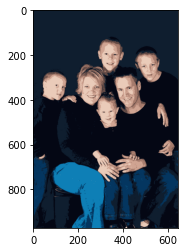

    Iteration # 2


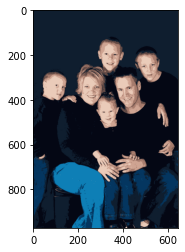

    Region detection


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


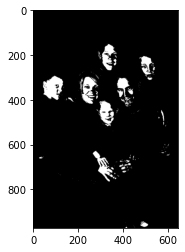

  The 8 Centroids Probability Maps
This centroid  [207 164 146] appeared  32037  times


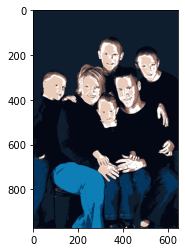

This centroid  [234 203 185] appeared  32309  times


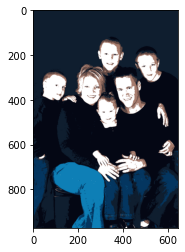

This centroid  [ 4  7 20] appeared  213323  times


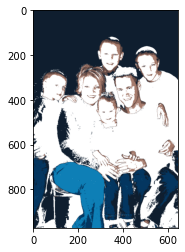

This centroid  [166 123 108] appeared  22238  times


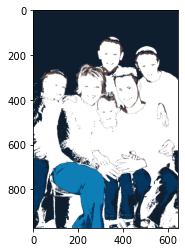

This centroid  [ 14 127 182] appeared  36586  times


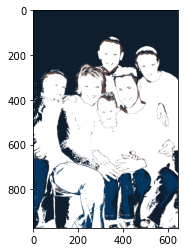

This centroid  [99 74 69] appeared  15651  times


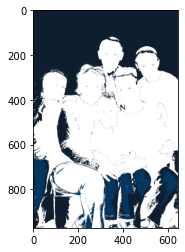

This centroid  [15 30 47] appeared  235337  times


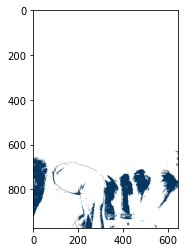

This centroid  [ 4 54 96] appeared  42375  times


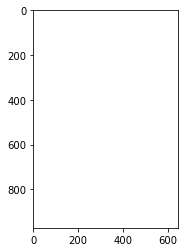

<Figure size 432x288 with 0 Axes>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
from PIL import Image, ImageTk  
from tkinter import messagebox
from numpy import *
import warnings
warnings.filterwarnings("ignore")


# read the image
root = Tk()
root.title('KMeans Cluster')
root.geometry("660x1080")
width_ = 0
height_= 0
empty = array([1,1,1])
full = array([255,255,255])
x_,y_,counter =  IntVar(root, value = 0, name ="x"),IntVar(root, value = 0, name ="y"), IntVar(root, value = 0, name ="c")
def comp_centers(a,b): # Compare if centers are equal for region detection
    if (a[0] == b [0] and a[1] == b [1] and a[2] == b[2] ):
        return True
    else:
        return False
def centroids(image_,center):
    i,counter = 0,0
    prob_image = np.zeros(shape=(972, 648, 3)) 
    p = 0
    for row in image_:
        counter +=1
        j=0
        for column in row:
            ##### Compare centers, if not equal make that pixel black
            if comp_centers(column, center): 
                p +=1
                image_[i][j] = full
            j +=1
        i += 1
    print("This centroid ", center,"appeared ",p," times")
    plt.imshow(image_)
    plt.show()
    plt.figure()
    
def getPosition(event):
    if(counter.get()==0):
        x, y = event.x, event.y  
        coordinates = "X"+"("+str(x)+","+str(y)+")"
        global label
        label =Label(root, text=coordinates, font=('Calibri 15'))
        label.place(x=x,y=y)
        counter.set(1)
        x_.set(x) # Get x-coordinate 
        y_.set(y) # Get y-coordinate
    else:
        messagebox.showwarning("Warning","You have already selected a region to detect")
def run( iteration_counter = 1):
    K = int(inputK.get("1.0", "end-1c")) # Get K from user
    iteration = int((inputIT.get("1.0", "end-1c"))) # Get # of iterations from user
    ################### MAIN ALGORITHM ##########################
    image = cv2.imread("image.jpg")  # Load Image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    image_in_pixels = image.reshape((-1, 3))   # Reshape as 2D matrix:  W*H x 3  
    image_in_pixels = np.float32(image_in_pixels)   # convert to float
    
    #### Run KMeans using python OpenCV  
    _, pixels, (centers) = cv2.kmeans(image_in_pixels, K, None, (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2), 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)     # 8 bit integers
    pixels = pixels.flatten()     # flatten the labels array
    result_image = centers[pixels.flatten()] 
    result_image = tuple(result_image.reshape(image.shape)) # reshape as normal image in 3D(W X H X RGB)
    region_detect = np.zeros(shape=(972, 648, 3)) 
    width_ = result_image[1] # Get width
    height_ = result_image[0] # Get height
    # show the image
    plt.imshow(result_image) # Plot Image
    ### SAVE IMAGE ###
    plt.savefig('output_1.jpg') 
    print("===================")
    print("    Iteration #",iteration_counter)
    print("===================")
    plt.show()
    plt.figure()
    i = 0
    counter = 0
    #### Check if every center equals the center requested by the user
    ### First, get the pixel
    ### Secondly, identify the center it belongs to
    ### Then, compare!
    if iteration_counter ==iteration:
        print("========================")
        print("    Region detection")
        print("=========================")
        for row in result_image:
            counter +=1
            j=0
            for column in row:
                ##### Compare centers, if not equal make that pixel black
                if comp_centers(column, result_image[y_.get()][x_.get()]): 
                    region_detect[i][j] = result_image[i][j]
                j +=1
            i += 1
        plt.imshow(region_detect)
        plt.savefig('output_2.jpg')
        plt.show()
        plt.figure()
        print("================================")
        print("  The",K, "Centroids Probability Maps")
        print("================================")
        for centroid in centers:   
            centroids(result_image,centroid) # Check probability Maps
    iteration_counter+=1
    if iteration_counter <= iteration:
        run(iteration_counter)
    else:
        root.destroy()
# TKinter code
inputK = Text(root, height = 1,width = 5,bg = "light yellow")
inputIT = Text(root, height = 1,width = 5,bg = "light yellow")
Ok_button=Button(root, text="Run", fg='black',command=run)
Ok_button.place(relx=0.46, rely=0.965)
Ok_button.config (height = 1, width = 5)
l = Label(text = "K: ")
lit = Label(text = "iterations: ")
l1 = Label (text = "Use Right Click to select one region to detect")
l1.place(relx=0.01,rely=0.92)
l2 = Label (text = "    Closes after execution and 2 Images will be saved")
l2.place(relx=0.55,rely=0.92)
inputK.place(relx = 0.46, rely = 0.92)
inputIT.place(relx = 0.46, rely = 0.94)
l.place(relx = 0.43, rely = 0.92)
lit.place(relx = 0.37, rely = 0.94)

frame = ImageTk.PhotoImage(Image.open("image.jpg"))  
main_canvas = Canvas(root, bg="white", height = 972, width = 648, cursor = "plus")
main_canvas.place(relx = 0.00001, rely = 0.0000001)
main_canvas.create_image(10,10,anchor=NW,image=frame)
main_canvas.bind('<Button-3>', getPosition)

root.mainloop()